In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fandango_scrape.csv')

In [3]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

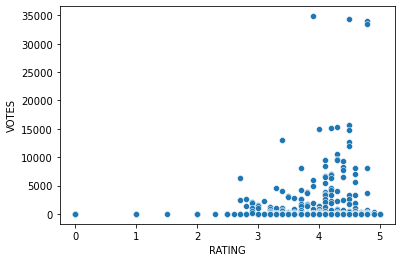

In [6]:
sns.scatterplot(data=df, x='RATING', y='VOTES')

In [7]:
df.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
df['YEAR'] = df['FILM'].apply(lambda year: year.split('(')[-1])

In [9]:
df['YEAR']

0      2015)
1      2015)
2      2015)
3      2015)
4      2015)
       ...  
499    2015)
500    2015)
501    2015)
502    1964)
503    2012)
Name: YEAR, Length: 504, dtype: object

In [10]:
df.value_counts('YEAR')

YEAR
2015)    478
2014)     23
1964)      1
2012)      1
2016)      1
dtype: int64

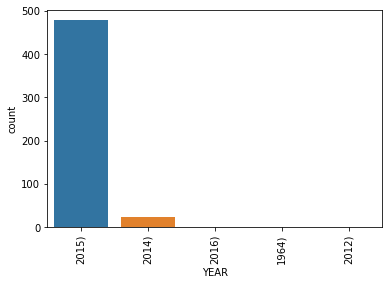

In [11]:
sns.countplot(data=df, x='YEAR')
plt.xticks(rotation=90);

In [12]:
df.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


In [13]:
(df['VOTES'] == 0).sum()

69

In [14]:
zero_votes = df[df['VOTES']==0]
zero_votes

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015)
436,7 Minutes (2015),0.0,0.0,0,2015)
437,A Year in Champagne (2015),0.0,0.0,0,2015)
438,Balls Out (2015),0.0,0.0,0,2015)
439,Before I Wake (2015),0.0,0.0,0,2015)
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015)
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015)
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015)
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964)


In [15]:
df = df[df['VOTES'] > 0]

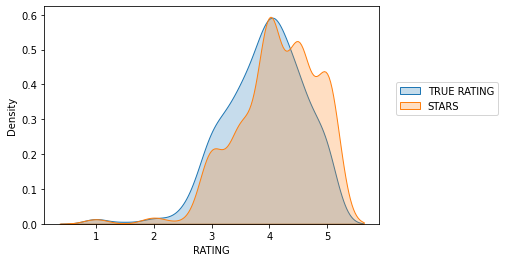

In [16]:

sns.kdeplot(data=df,x='RATING',fill=True, label='TRUE RATING')
sns.kdeplot(data=df,x='STARS', fill=True, label='STARS')
plt.legend(loc=(1.05,0.5))

In [17]:
df['STAR_DIFF'] = df['STARS'] - df['RATING']
df['STAR_DIFF'] = round(df['STAR_DIFF'], 1)
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0


In [18]:
counts = df["STAR_DIFF"].value_counts()
counts

0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: STAR_DIFF, dtype: int64

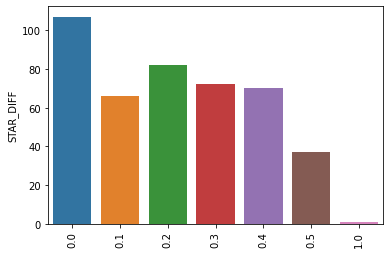

In [19]:
sns.barplot(data=df, y=counts , x=counts.index )
plt.xticks(rotation=90);

In [20]:
df[df["STAR_DIFF"] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


### COMPARISION OF FANDANGO RATINGS TO OTHER

In [21]:
df1=pd.read_csv('all_sites_scores.csv')

In [22]:
df1.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [24]:
df1.isna().sum()

FILM                          0
RottenTomatoes                0
RottenTomatoes_User           0
Metacritic                    0
Metacritic_User               0
IMDB                          0
Metacritic_user_vote_count    0
IMDB_user_vote_count          0
dtype: int64

In [25]:
df1.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [26]:
df1.corr()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
RottenTomatoes,1.000000,0.781440,0.957360,0.754296,0.779671,0.111325,0.107083
RottenTomatoes_User,0.781440,1.000000,0.690998,0.687132,0.895297,0.198320,0.221776
Metacritic,0.957360,0.690998,1.000000,0.723459,0.727298,0.138184,0.114507
Metacritic_User,0.754296,0.687132,0.723459,1.000000,0.756265,0.121478,0.112580
IMDB,0.779671,0.895297,0.727298,0.756265,1.000000,0.205573,0.230058
Metacritic_user_vote_count,0.111325,0.198320,0.138184,0.121478,0.205573,1.000000,0.880635
IMDB_user_vote_count,0.107083,0.221776,0.114507,0.112580,0.230058,0.880635,1.000000


### ROTTEN TOMATOES

In [27]:
df1[['RottenTomatoes', 'RottenTomatoes_User']]


,RottenTomatoes,RottenTomatoes_User
0,74,86
1,85,80
2,80,90
3,18,84
4,14,28
...,...,...
141,87,78
142,97,82
143,97,78
144,100,81


<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

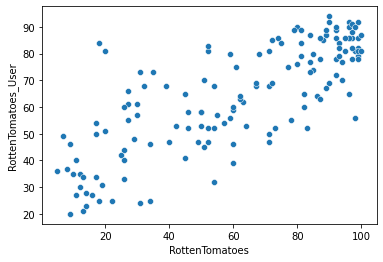

In [28]:
sns.scatterplot(data=df1, x='RottenTomatoes', y='RottenTomatoes_User')

In [29]:
df1['rating_diff'] =  df1['RottenTomatoes'] - df1['RottenTomatoes_User']

In [30]:

mean= df1['rating_diff'].abs().mean()
mean

15.095890410958905

In [31]:
df1['rating_diff'].abs()

0      12
1       5
2      10
3      66
4      14
       ..
141     9
142    15
143    19
144    19
145    24
Name: rating_diff, Length: 146, dtype: int64

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

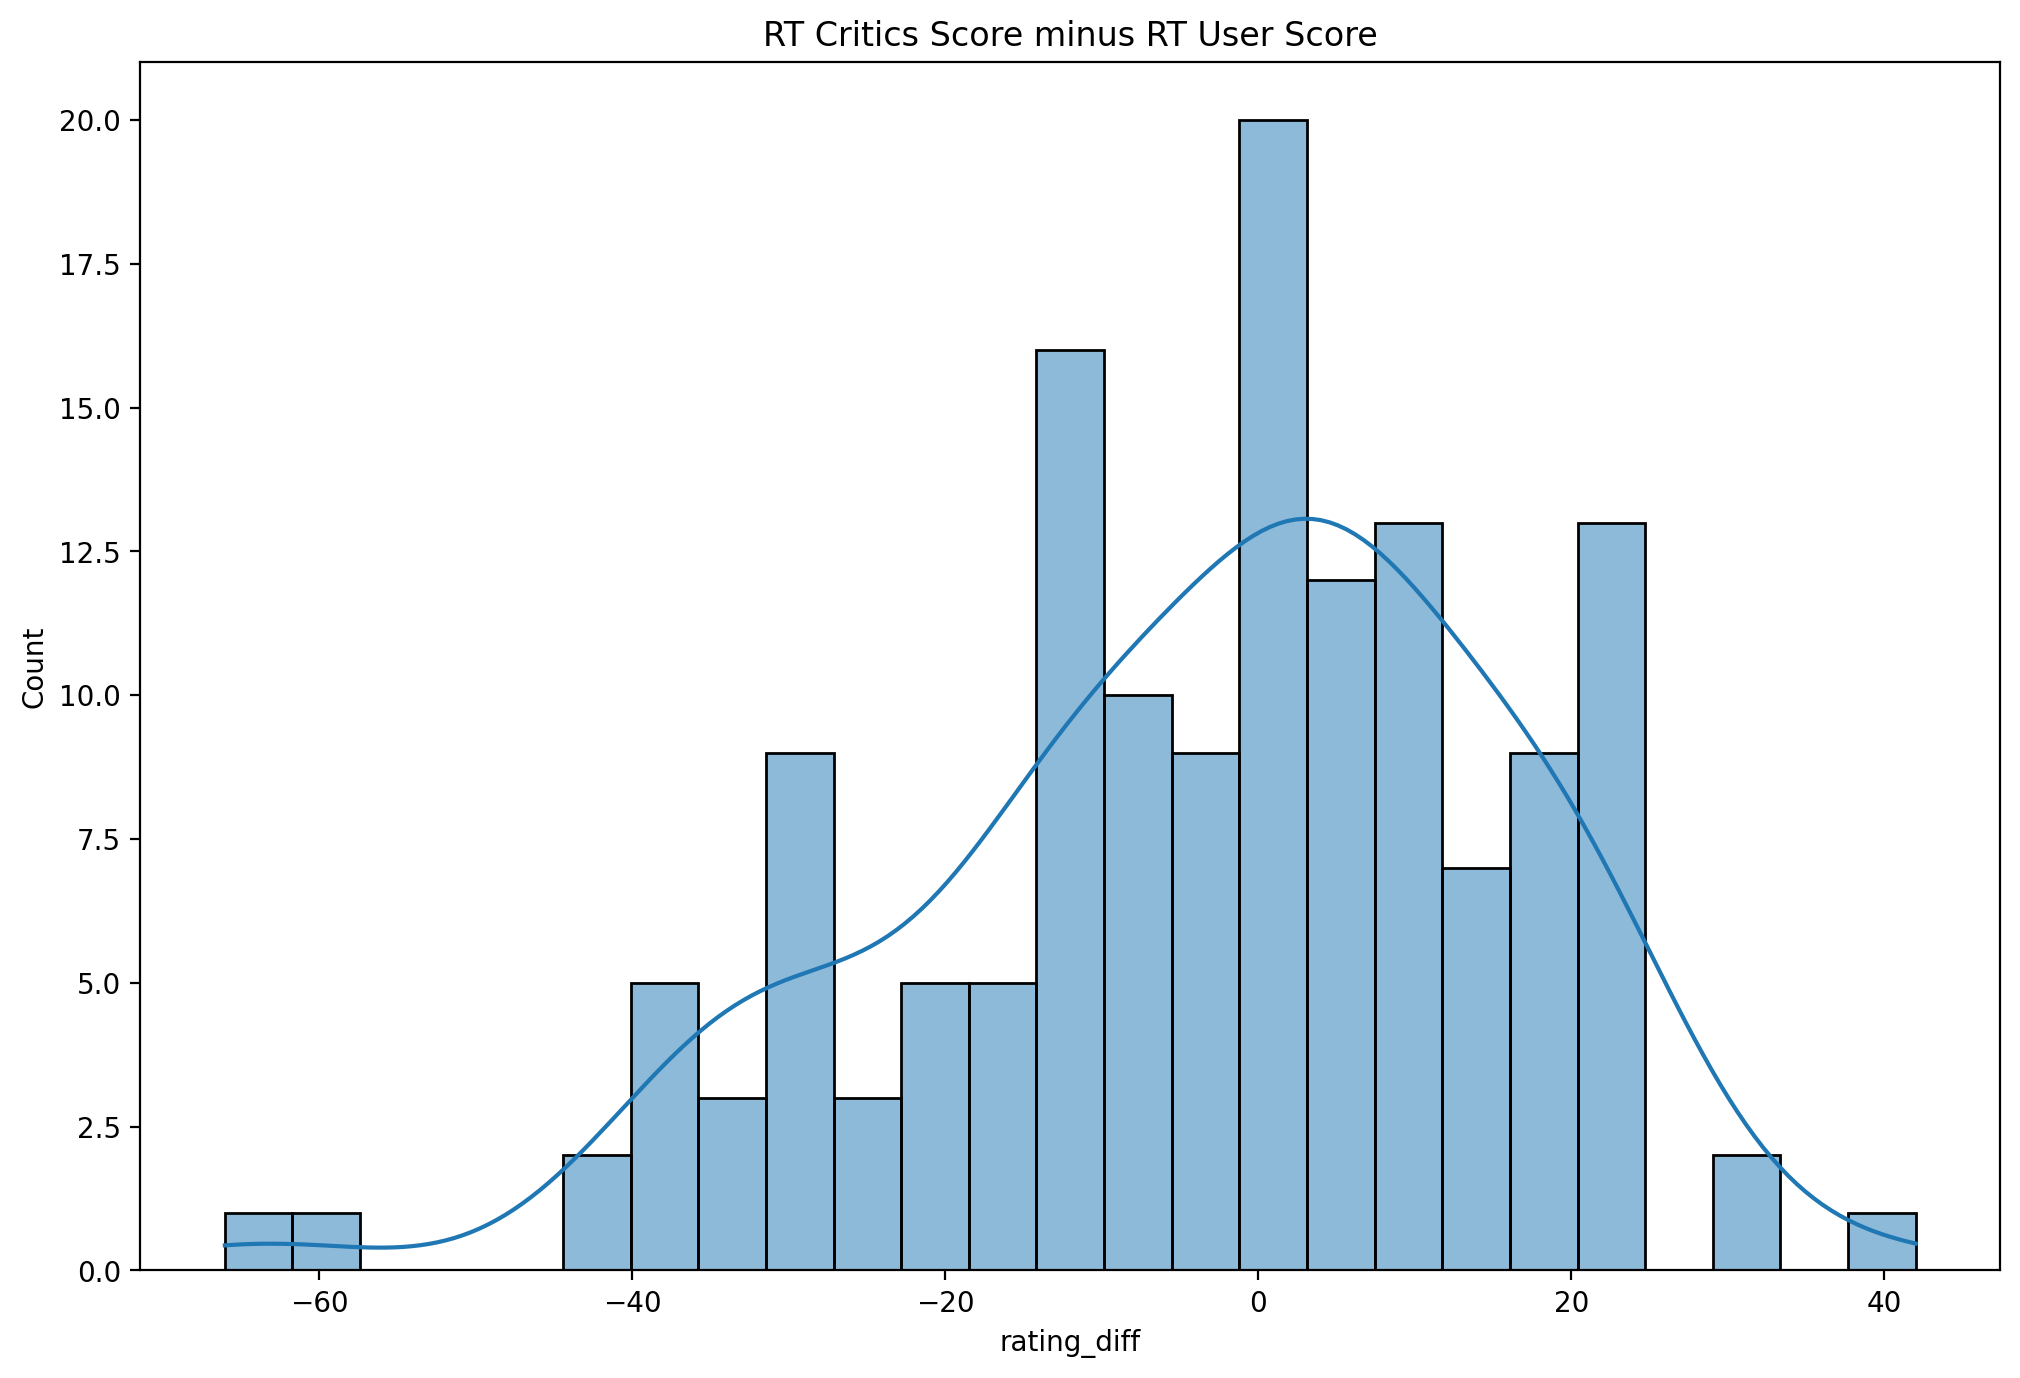

In [32]:
plt.figure(figsize=(12,8), dpi=200)
sns.histplot(data=df1,x=df1['rating_diff'],  kde=True, bins=25)
plt.title("RT Critics Score minus RT User Score")

Text(0.5, 1.0, 'Abs Difference between RT Critics Score and RT User Score')

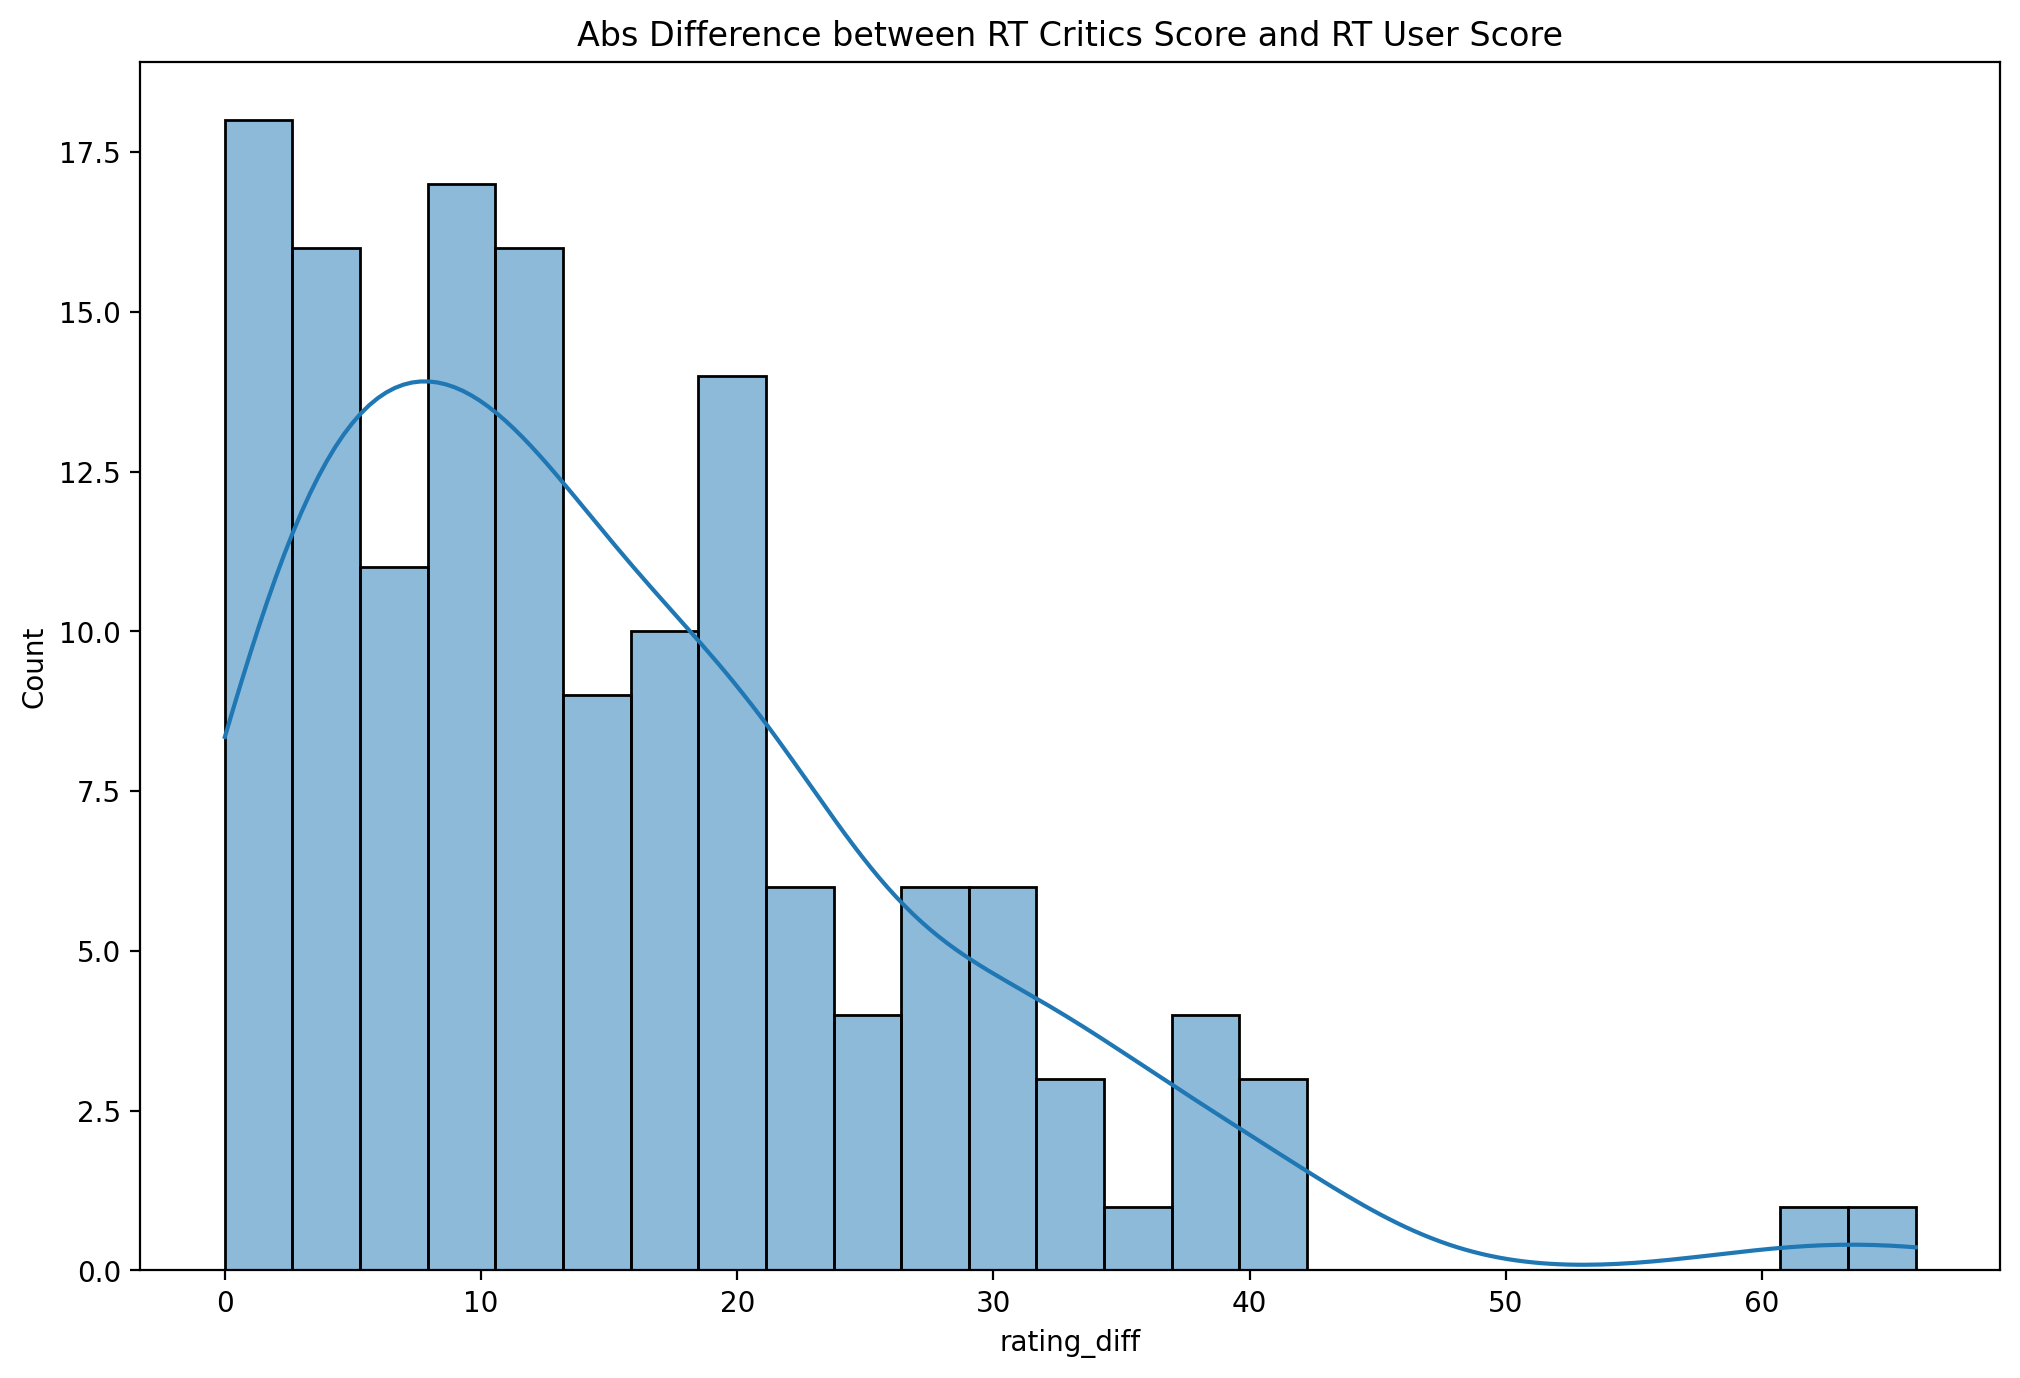

In [33]:
plt.figure(figsize=(12,8), dpi=200)
sns.histplot(x=df1['rating_diff'].abs(), kde=True, bins=25)
plt.title("Abs Difference between RT Critics Score and RT User Score")

In [34]:
df1.nsmallest(n=5,columns='rating_diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rating_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


### METACRITIC

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

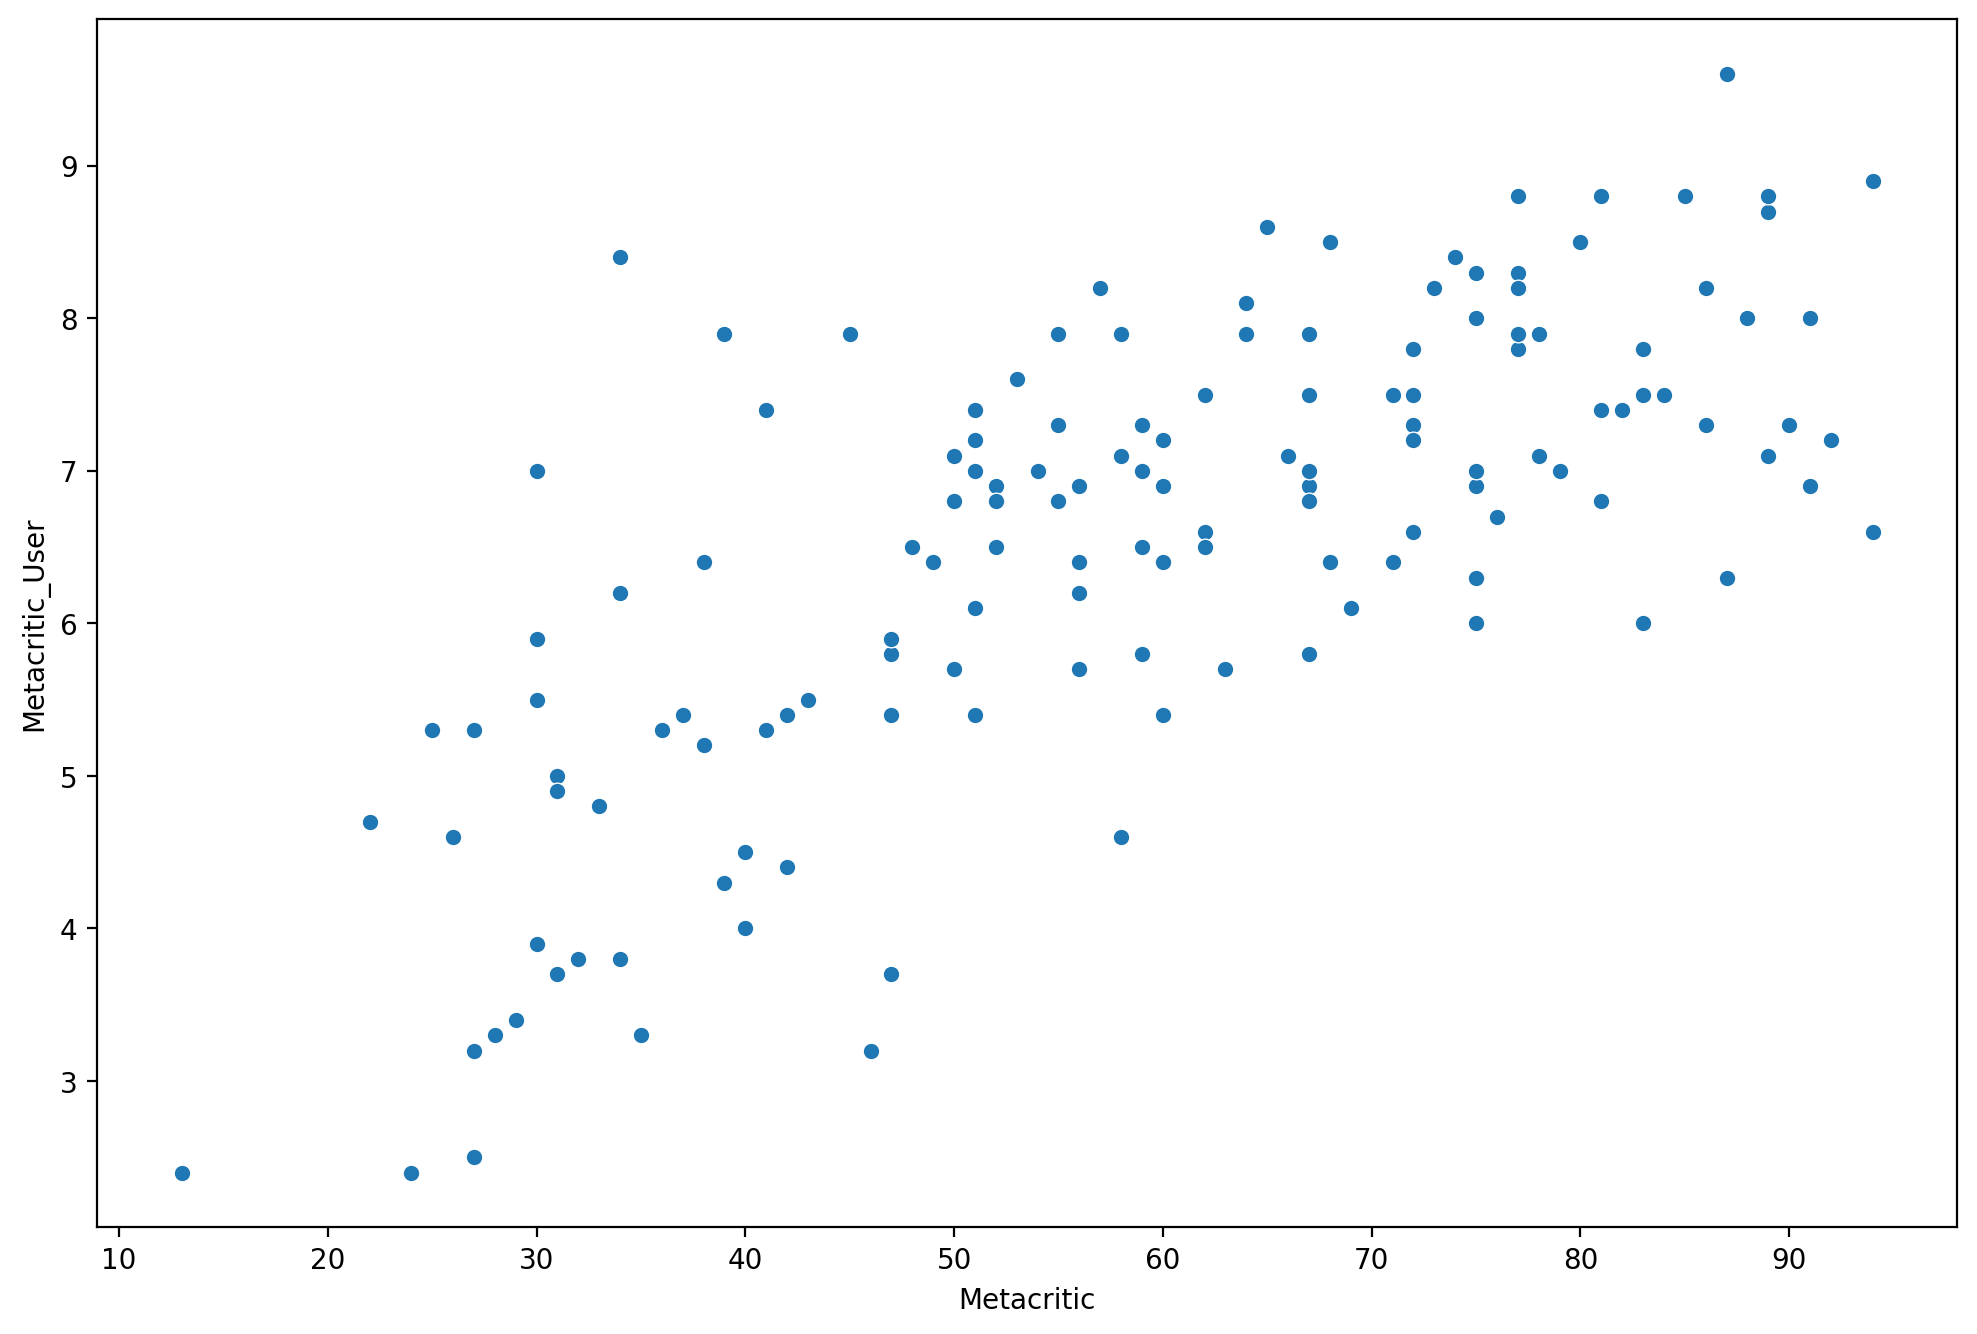

In [35]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df1, x='Metacritic', y='Metacritic_User')

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

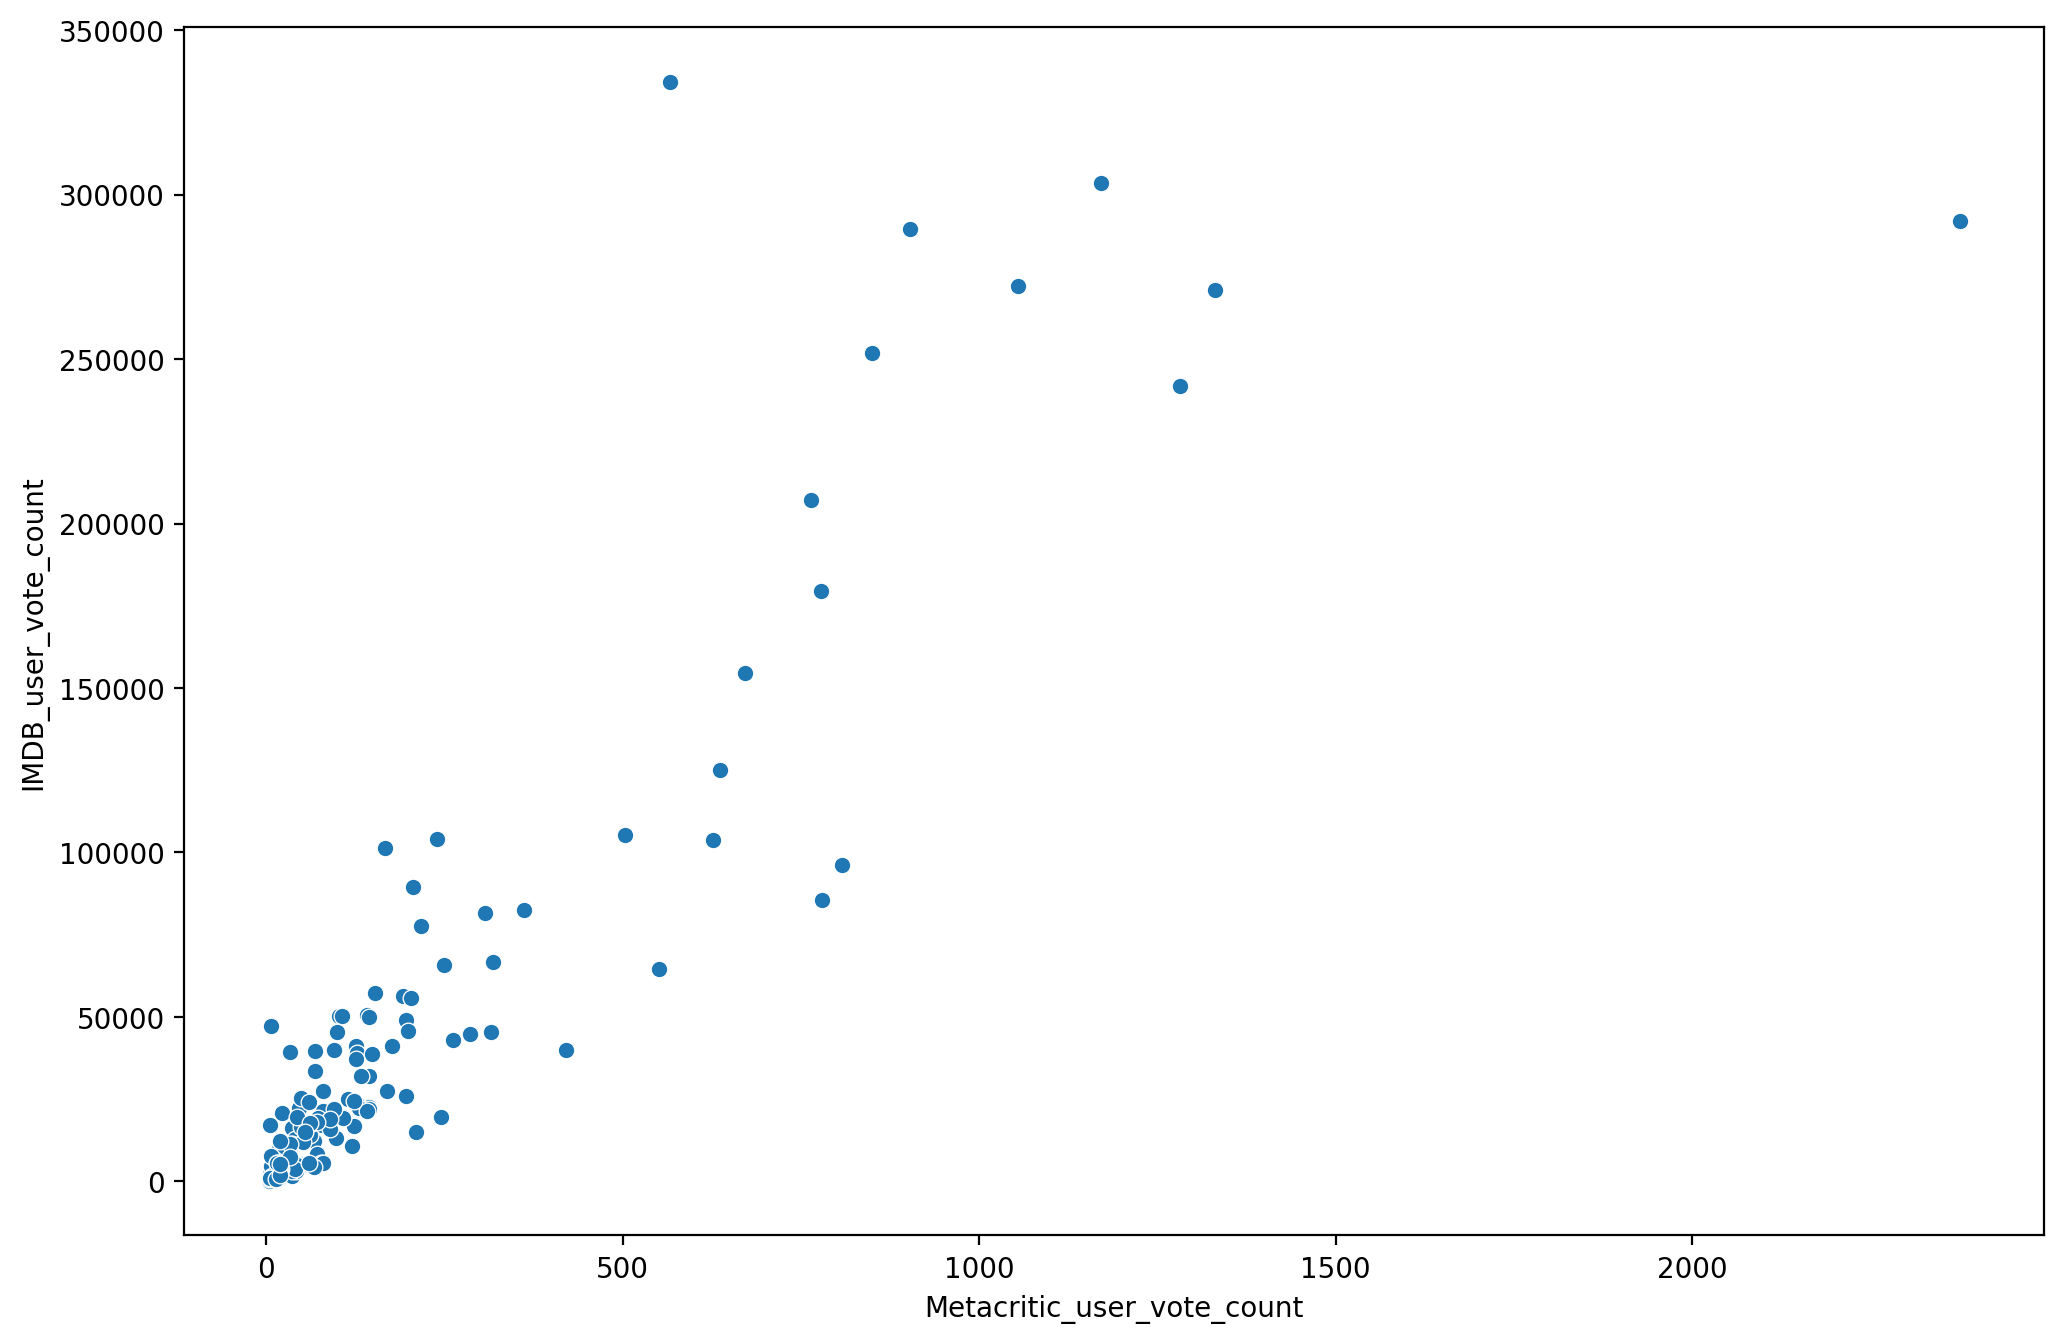

In [36]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df1, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

In [37]:
df1.nlargest(n=1, columns='IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rating_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [38]:
df1.nlargest(n=1, columns='Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rating_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [64]:
df2 = pd.merge(df,df1,on='FILM', how='inner')

In [65]:
df2

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rating_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),0.0,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015),0.0,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015),0.4,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015),0.3,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015),0.1,95,86,86,7.3,7.4,14,696,9


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FILM       435 non-null    object 
 1   STARS      435 non-null    float64
 2   RATING     435 non-null    float64
 3   VOTES      435 non-null    int64  
 4   YEAR       435 non-null    object 
 5   STAR_DIFF  435 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 23.8+ KB


In [67]:
df2.head()

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rating_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),0.0,98,90,94,8.9,8.6,807,96252,8


In [68]:
df2['RottenTomatoes'] = np.round(df2['RottenTomatoes']/20,1)
df2['RottenTomatoes_User'] = np.round(df2['RottenTomatoes_User']/20,1)
df2['Metacritic'] = np.round(df2['Metacritic']/20,1)
df2['Metacritic_User'] = np.round(df2['Metacritic_User']/2,1)
df2['IMDB'] = np.round(df2['IMDB']/2,1)

In [69]:
df2.head()

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rating_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1,1.2,2.1,2.3,1.6,2.1,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0,3.6,4.0,3.0,3.5,3.6,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),0.2,3.6,4.2,3.6,3.3,3.7,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2,4.0,4.2,3.4,3.4,3.7,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),0.0,4.9,4.5,4.7,4.4,4.3,807,96252,8


In [71]:
df3 = df2.rename(columns = {'RottenTomatoes':'RT_Norm', 'RottenTomatoes_User':'RTU_Norm', 'Metacritic': 'Meta_Norm',
                           'Metacritic_User':'Meta_U_Norm', 'IMDB':'IMDB_Norm'})

In [73]:
df3.head()

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,Metacritic_user_vote_count,IMDB_user_vote_count,rating_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1,1.2,2.1,2.3,1.6,2.1,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0,3.6,4.0,3.0,3.5,3.6,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),0.2,3.6,4.2,3.6,3.3,3.7,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2,4.0,4.2,3.4,3.4,3.7,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),0.0,4.9,4.5,4.7,4.4,4.3,807,96252,8


In [76]:
norm_scores = df3[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [77]:
norm_scores

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7
